In [1]:
import nannyml as nml
from IPython.display import display

reference, analysis, analysis_targets = nml.load_synthetic_car_loan_dataset()
display(reference.head())

/var/home/nannyml/.conda/envs/poetry/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,car_value,salary_range,debt_to_income_ratio,loan_length,repaid_loan_on_prev_car,size_of_downpayment,driver_tenure,repaid,timestamp,y_pred_proba,y_pred
0,39811.0,40K - 60K €,0.632950,19.0,False,40%,0.212653,1.0,2018-01-01 00:00:00.000,0.99,1
1,12679.0,40K - 60K €,0.718627,7.0,True,10%,4.927549,0.0,2018-01-01 00:08:43.152,0.07,0
2,19847.0,40K - 60K €,0.721724,17.0,False,0%,0.520817,1.0,2018-01-01 00:17:26.304,1.00,1
3,22652.0,20K - 20K €,0.705992,16.0,False,10%,0.453649,1.0,2018-01-01 00:26:09.456,0.98,1
4,21268.0,60K+ €,0.671888,21.0,True,30%,5.695263,1.0,2018-01-01 00:34:52.608,0.99,1


In [8]:
from docs.utils import print_multi_index_markdown
print_multi_index_markdown(reference.head())

+----+-------------+----------------+------------------------+---------------+---------------------------+-----------------------+-----------------+----------+-------------------------+----------------+----------+
|    | car_value   | salary_range   | debt_to_income_ratio   | loan_length   | repaid_loan_on_prev_car   | size_of_downpayment   | driver_tenure   | repaid   | timestamp               | y_pred_proba   | y_pred   |
+====+=============+================+========================+===============+===========================+=======================+=================+==========+=========================+================+==========+
| 0  | 39811       | 40K - 60K €    | 0.63295                | 19            | False                     | 40%                   | 0.212653        | 1        | 2018-01-01 00:00:00.000 | 0.99           | 1        |
+----+-------------+----------------+------------------------+---------------+---------------------------+-----------------------+--------------

In [5]:
selected_columns = [
    'car_value', 'debt_to_income_ratio', 'driver_tenure'
]
calc = nml.SimpleStatsAvgCalculator(
    column_names=selected_columns,
)

In [6]:
calc.fit(reference)
results = calc.calculate(analysis)
display(results.filter(period='all').to_df())

chunk                                                        \
              key chunk_index start_index end_index start_date end_date   
0        [0:4999]           0           0      4999       None     None   
1     [5000:9999]           1        5000      9999       None     None   
2   [10000:14999]           2       10000     14999       None     None   
3   [15000:19999]           3       15000     19999       None     None   
4   [20000:24999]           4       20000     24999       None     None   
5   [25000:29999]           5       25000     29999       None     None   
6   [30000:34999]           6       30000     34999       None     None   
7   [35000:39999]           7       35000     39999       None     None   
8   [40000:44999]           8       40000     44999       None     None   
9   [45000:49999]           9       45000     49999       None     None   
10       [0:4999]           0           0      4999       None     None   
11    [5000:9999]           1        5000      9999       None     None   
12  [10000:14999]           2       10000     14999       None     None   
13  [15000:19999]           3       15000     19999       None     None   
14  [20000:24999]           4       20000     24999       None     None   
15  [25000:29999]           5       25000     29999       None     None   
16  [30000:34999]           6       30000     34999       None     None   
17  [35000:39999]           7       35000     39999       None     None   
18  [40000:44999]           8       40000     44999       None     None   
19  [45000:49999]           9       45000     49999       None     None   

                car_value                                         \
       period       value upper_threshold lower_threshold  alert   
0   reference  29660.4932    30193.234666    29096.098174  False   
1   reference  29617.6940    30193.234666    29096.098174  False   
2   reference  29577.5972    30193.234666    29096.098174  False   
3   reference  29458.0058    30193.234666    29096.098174  False   
4   reference  29436.5742    30193.234666    29096.098174  False   
5   reference  29943.2974    30193.234666    29096.098174  False   
6   reference  29918.3642    30193.234666    29096.098174  False   
7   reference  29725.6046    30193.234666    29096.098174  False   
8   reference  29733.1880    30193.234666    29096.098174  False   
9   reference  29375.8456    30193.234666    29096.098174  False   
10   analysis  29961.1702    30193.234666    29096.098174  False   
11   analysis  29876.0978    30193.234666    29096.098174  False   
12   analysis  29877.3006    30193.234666    29096.098174  False   
13   analysis  29983.7982    30193.234666    29096.098174  False   
14   analysis  29231.8282    30193.234666    29096.098174  False   
15   analysis  48378.2568    30193.234666    29096.098174   True   
16   analysis  49061.1950    30193.234666    29096.098174   True   
17   analysis  48814.4672    30193.234666    29096.098174   True   
18   analysis  49046.0732    30193.234666    29096.098174   True   
19   analysis  48706.3372    30193.234666    29096.098174   True   

   debt_to_income_ratio                                        driver_tenure  \
                  value upper_threshold lower_threshold  alert         value   
0              0.585079        0.590895        0.580378  False      4.616143   
1              0.582728        0.590895        0.580378  False      4.616930   
2              0.586344        0.590895        0.580378  False      4.571620   
3              0.584026        0.590895        0.580378  False      4.629099   
4              0.585748        0.590895        0.580378  False      4.594703   
5              0.584041        0.590895        0.580378  False      4.613036   
6              0.587836        0.590895        0.580378  False      4.570009   
7              0.588643        0.590895        0.580378  False      4.580638   
8              0.584906        0.590895        0.580378  False  

In [11]:
print_multi_index_markdown(results.filter(period='all').to_df())

+----+---------------+-----------------+-----------------+---------------+----------------+--------------+------------+---------------+---------------------+---------------------+-----------+--------------------------+---------------------+---------------------+-----------+-------------------+---------------------+---------------------+-----------+
|    | | chunk       |                 |                 |               |                |              |            | | car_value   |                     |                     |           | | debt_to_income_ratio   |                     |                     |           | | driver_tenure   |                     |                     |           |
|    | | key         | | chunk_index   | | start_index   | | end_index   | | start_date   | | end_date   | | period   | | value       | | upper_threshold   | | lower_threshold   | | alert   | | value                  | | upper_threshold   | | lower_threshold   | | alert   | | value           | | u

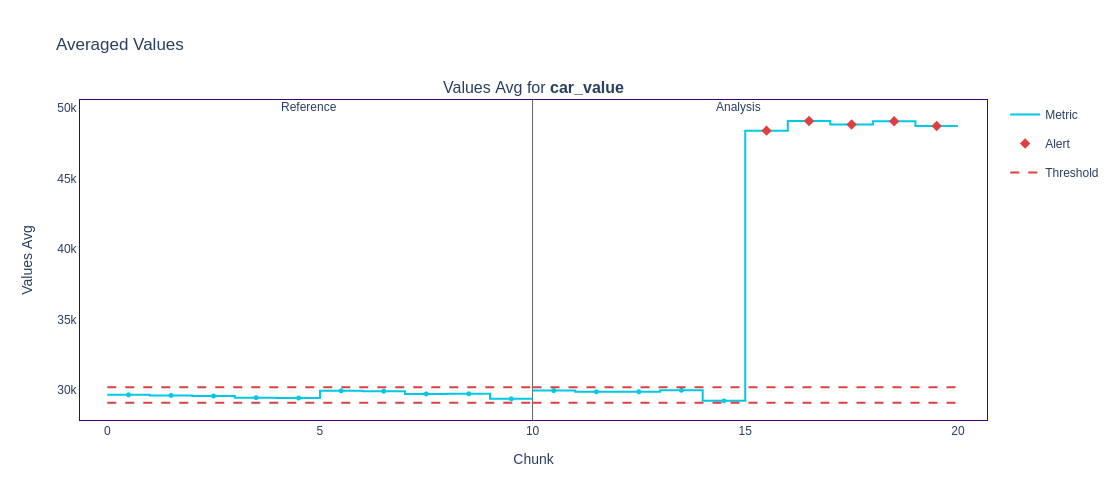

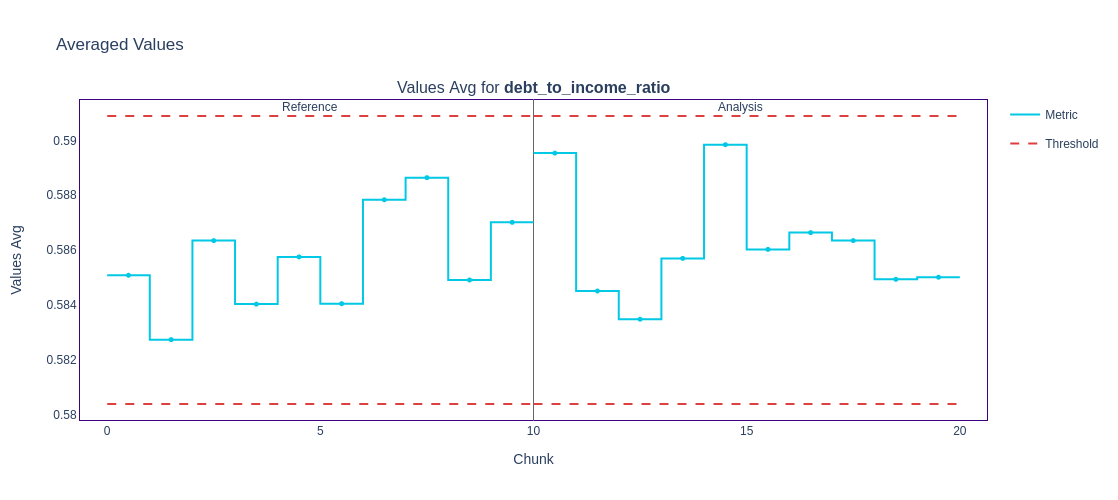

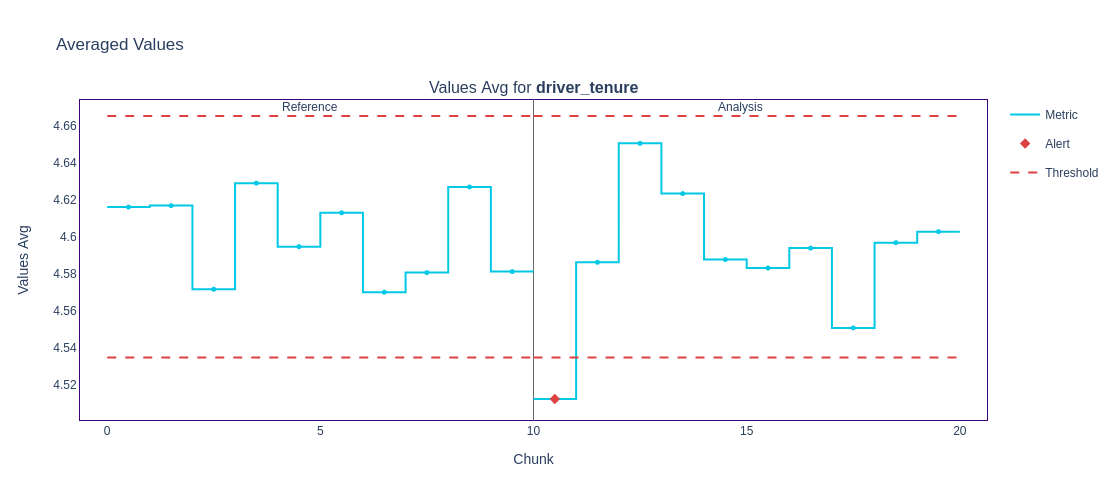

In [7]:
for column_name in results.column_names:
    results.filter(column_names=column_name).plot().show()